# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import re

Please import the fifa.csv dataset and assign it to a variable called fifa.

In [34]:
fifa = pd.read_csv("fifa.csv")

Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [16]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            18207 non-null  object 
 1   Age             18207 non-null  int64  
 2   Nationality     18207 non-null  object 
 3   Overall         18207 non-null  int64  
 4   Potential       18207 non-null  int64  
 5   Club            17966 non-null  object 
 6   Value           18207 non-null  object 
 7   Preferred Foot  18159 non-null  object 
 8   Position        18147 non-null  object 
 9   Weak Foot       18159 non-null  float64
 10  Acceleration    18159 non-null  float64
 11  SprintSpeed     18159 non-null  float64
 12  Stamina         18159 non-null  float64
 13  Strength        18159 non-null  float64
 14  LongShots       18159 non-null  float64
 15  Aggression      18159 non-null  float64
 16  Interceptions   18159 non-null  float64
 17  Positioning     18159 non-null 

In [35]:
#removing the '€' at the beginning
fifa['Value'] = fifa['Value'].apply(lambda x: x[1:])

In [36]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

In [37]:
fifa['ValueNumeric'] = fifa['Value'].apply(value_to_float)

In [17]:
#ifa["ValueNumeric"] = fifa["Value"].str.replace(r'\D+', '').astype('int')
#bütün non-numeric karakterleri kaldir ve datatype integer yap

In [33]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500000.0
3,De Gea,27,Spain,91,93,Manchester United,72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000000.0


# Challenge 1 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [38]:
fifa.isnull().sum()
fifa.dropna(axis=0,inplace=True)

In [39]:
fifa.shape

(17918, 21)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [40]:
import statsmodels.api as sm

Y = fifa["ValueNumeric"]
X = fifa[["Stamina","SprintSpeed"]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          8.04e-193
Time:                        16:03:47   Log-Likelihood:            -3.0350e+05
No. Observations:               17918   AIC:                         6.070e+05
Df Residuals:                   17915   BIC:                         6.070e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.07e+06   1.97e+05    -15.600      0.000   -3.46e+06   -2.68e+06
Stamina      6.037e+04   3290.118     18.349      0.000    5.39e+04    6.68e+04
SprintSpeed  2.631e+04   3565.332      7.380      0.000    1.93e+04    3.33e+04
==============================================================================
Omnibus:                    22840.822   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4648189.356
Skew:                           7.042   Prob(JB):                         0.00
Kurtosis:                      80.638   Cond. No.                         444.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [42]:

#In this example Stamina and SprintSpeed seem to be good predictors due to their small p-value.

#If the R squared is low it just means that with the variables we have now (Stamina and SprintSpeed),
#you explain only a small amount of the variation in player values.

#Which makes sense, because if the R square was high it’d mean that a player’s value is determined only 
#by stamina and speed whereas in reality there are much more factors - like age, experience, goals


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [44]:
X = fifa[['Potential']]
X = sm.add_constant(X) # We must add the intercept using the add_constant function
Y = fifa.ValueNumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Sat, 26 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:08:18   Log-Likelihood:            -3.0027e+05
No. Observations:               17918   AIC:                         6.006e+05
Df Residuals:                   17916   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.544e+07      4e+05    -88.693      0.000   -3.62e+07   -3.47e+07
Potential   5.312e+05   5581.083     95.172      0.000     5.2e+05    5.42e+05
==============================================================================
Omnibus:                    23030.426   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6340772.995
Skew:                           7.013   Prob(JB):                         0.00
Kurtosis:                      94.084   Cond. No.                         834.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here:



Plot a scatter plot of value vs. potential. Do you see a linear relationship?

<AxesSubplot:xlabel='Potential', ylabel='ValueNumeric'>

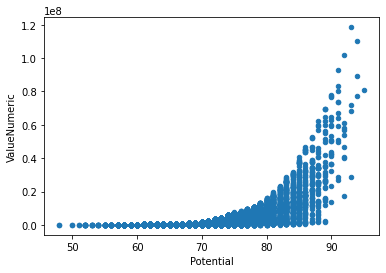

In [45]:
fifa.plot.scatter(x="Potential",y="ValueNumeric")

In [ ]:
# Your conclusions here:

'''
Seems to be a positive exponential relationship. Meaning that, a player with good Potential has a certain
Value, but a player with very Potential has much much more value.
'''

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Run an appropriate linear regression and careful how you include the variable! Please comment on your results.



In [46]:
# Your code here:
X1 = pd.get_dummies(fifa['Preferred Foot'], drop_first=True)
X2 = pd.get_dummies(fifa['Position'], drop_first=True)

'''
If using categorical variables in your regression, you need to add n-1 dummy variables; thus the drop_first=True but
you can also drop selectively the columns (e.g. the loweste value). 
Here ‘n’ is the number of categories in the variable.
In this example below, variable ‘Preferred Foot’ has two categories (left and right foot)
'''

X = pd.concat([X1, X2], axis=1) 
X = sm.add_constant(X) 
Y = fifa.ValueNumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     20.14
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           5.71e-96
Time:                        16:09:55   Log-Likelihood:            -3.0367e+05
No. Observations:               17918   AIC:                         6.074e+05
Df Residuals:                   17890   BIC:                         6.076e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.333e+06   1.99e+05     16.788      0.000    2.94e+06    3.72e+06
Right      -3.099e+05   1.13e+05     -2.738      0.006   -5.32e+05    -8.8e+04
CB         -1.475e+06   2.24e+05     -6.586      0.000   -1.91e+06   -1.04e+06
CDM        -9.633e+05   2.56e+05     -3.758      0.000   -1.47e+06   -4.61e+05
CF          1.735e+05    6.7e+05      0.259      0.796   -1.14e+06    1.49e+06
CM         -1.088e+06   2.35e+05     -4.637      0.000   -1.55e+06   -6.28e+05
GK         -1.443e+06    2.2e+05     -6.561      0.000   -1.87e+06   -1.01e+06
LAM          2.91e+06   1.23e+06      2.375      0.018    5.09e+05    5.31e+06
LB         -1.555e+06   2.47e+05     -6.297      0.000   -2.04e+06   -1.07e+06
LCB        -8.787e+04   2.85e+05     -0.308      0.758   -6.46e+05    4.71e+05
LCM         1.231e+06   3.34e+05      3.681      0.000    5.75e+05    1.89e+06
LDM         1.459e+05   4.02e+05      0.363      0.717   -6.42e+05    9.34e+05
LF          1.407e+07   1.44e+06      9.737      0.000    1.12e+07    1.69e+07
LM         -3.173e+05   2.47e+05     -1.284      0.199   -8.02e+05    1.67e+05
LS           1.83e+06   4.27e+05      4.285      0.000    9.93e+05    2.67e+06
LW          4.065e+05   3.39e+05      1.199      0.231   -2.58e+05    1.07e+06
LWB        -9.817e+05   6.57e+05     -1.494      0.135   -2.27e+06    3.07e+05
RAM         2.174e+06   1.23e+06      1.775      0.076   -2.27e+05    4.58e+06
RB         -1.308e+06    2.4e+05     -5.445      0.000   -1.78e+06   -8.37e+05
RCB          5.48e+04   2.84e+05      0.193      0.847   -5.01e+05    6.11e+05
RCM          1.11e+06   3.35e+05      3.311      0.001    4.53e+05    1.77e+06
RDM         1.092e+05   3.98e+05      0.275      0.784    -6.7e+05    8.89e+05
RF          9.423e+06    1.4e+06      6.732      0.000    6.68e+06    1.22e+07
RM         -3.312e+05   2.45e+05     -1.350      0.177   -8.12e+05     1.5e+05
RS          1.021e+06   4.31e+05      2.367      0.018    1.76e+05    1.87e+06
RW          5.771e+05   3.42e+05      1.687      0.092   -9.33e+04    1.25e+06
RWB        -1.092e+06   6.22e+05     -1.754      0.080   -2.31e+06    1.29e+05
ST         -7.143e+05   2.17e+05     -3.288      0.001   -1.14e+06   -2.88e+05
==============================================================================
Omnibus:                    22296.156   Durbin-Watson:                   0.168
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3940469.451
Skew:                           6.784   Prob(JB):                         0.00
Kurtosis:                      74.371   Cond. No.                         46.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Finally, we would like to see the impact of a player's nationality on their value. Run an appropriate linear regression and comment on your results.

In [47]:
# Your code here:

# Your code here:
X = pd.get_dummies(fifa['Nationality'], drop_first=True)
X = sm.add_constant(X) 
Y = fifa.ValueNumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     6.720
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          5.65e-132
Time:                        16:10:18   Log-Likelihood:            -3.0341e+05
No. Observations:               17918   AIC:                         6.071e+05
Df Residuals:                   17755   BIC:                         6.084e+05
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.425e+05   2.75e+06      0.125      0.901   -5.04e+06    5.72e+06
Albania               1.617e+06   2.88e+06      0.561      0.575   -4.03e+06    7.27e+06
Algeria               4.328e+06   2.84e+06      1.526      0.127   -1.23e+06    9.89e+06
Andorra               -5.25e+04   6.14e+06     -0.009      0.993   -1.21e+07     1.2e+07
Angola                1.676e+06   3.09e+06      0.542      0.588   -4.38e+06    7.73e+06
Antigua & Barbuda     1.925e+05   3.88e+06      0.050      0.960   -7.42e+06     7.8e+06
Argentina             2.741e+06   2.75e+06      0.996      0.319   -2.65e+06    8.13e+06
Armenia               3.375e+06   3.25e+06      1.039      0.299   -2.99e+06    9.74e+06
Australia             4.008e+05   2.77e+06      0.145      0.885   -5.03e+06    5.83e+06
Austria               1.275e+06   2.76e+06      0.461      0.645   -4.14e+06    6.69e+06
Azerbaijan            1.765e+05   3.68e+06      0.048      0.962   -7.04e+06     7.4e+06
Barbados              5.917e+04   4.19e+06      0.014      0.989   -8.16e+06    8.28e+06
Belarus               2.101e+06   3.88e+06      0.541      0.588   -5.51e+06    9.71e+06
Belgium               4.375e+06   2.77e+06      1.581      0.114   -1.05e+06     9.8e+06
Belize                -9.25e+04   6.14e+06     -0.015      0.988   -1.21e+07    1.19e+07
Benin                 1.304e+06   3.09e+06      0.422      0.673   -4.75e+06    7.36e+06
Bermuda                7.45e+05   4.76e+06      0.157      0.876   -8.58e+06    1.01e+07
Bolivia               1.153e+06   3.54e+06      0.325      0.745    -5.8e+06     8.1e+06
Bosnia Herzegovina     3.34e+06   2.83e+06      1.178      0.239   -2.22e+06     8.9e+06
Botswana             -1.825e+05   6.14e+06     -0.030      0.976   -1.22e+07    1.19e+07
Brazil                 4.27e+06   2.75e+06      1.551      0.121   -1.12e+06    9.67e+06
Bulgaria              1.522e+06   3.17e+06      0.480      0.631   -4.69e+06    7.74e+06
Burkina Faso          2.545e+06   3.07e+06      0.829      0.407   -3.47e+06    8.56e+06
Burundi               9.258e+05   4.19e+06      0.221      0.825    -7.3e+06    9.15e+06
Cameroon              2.354e+06   2.81e+06      0.838      0.402   -3.15e+06    7.86e+06
Canada                6.619e+05   2.84e+06      0.233      0.816    -4.9e+06    6.22e+06
Cape Verde            4.084e+06   3.02e+06      1.352      0.176   -1.84e+06       1e+07
Central African Rep.  9.708e+06   4.19e+06      2.314      0.021    1.49e+06    1.79e+07
Chad                  3.058e+06   4.76e+06      0.643      0.520   -6.26e+06    1.24e+07
Chile                 1.009e+06   2.76e+06      0.365      0.715    -4.4e+06    6.42e+06
China PR              1.327e+04   2.76e+06      0.005      0.996    -5.4e+06    5.42e+06
Colombia              1.448e+06   2.75e+06      0.526    

In [ ]:
'''
Some of them are not significant (e.g. too litle samples). Check how high are the p-values and how the 
interval (values below [0.025  0.975] contain the zero and are too broad).
We can drop them (e.g. Andorra, Antigua & Barbuda, Australia, Zambia, etc) and run the model again
and see how it behaves.
'''

In [ ]:
'''
To drop the insignificant variables, you can make a condition to find the p.values <0.05,
get the name of those variables and then drop the rows with these values (Albania, Algeria, Andorra, etc)
in fifa['Nationality']. And run the model again with the new dataframe.
'''

In [48]:
model.pvalues

const         0.900734
Albania       0.574825
Algeria       0.126947
Andorra       0.993178
Angola        0.587626
                ...   
Uzbekistan    0.562049
Venezuela     0.439835
Wales         0.608880
Zambia        0.811523
Zimbabwe      0.437444
Length: 163, dtype: float64